In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Complete.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Ticker
0,2009-11-17,18.264,18.316,18.249,18.292,373979,bab
1,2009-11-18,18.273,18.273,18.191,18.214,98147,bab
2,2009-11-19,18.316,18.316,18.273,18.292,78682,bab
3,2009-11-20,18.308,18.331,18.226,18.331,132702,bab
4,2009-11-23,18.264,18.316,18.249,18.249,28563,bab


In [3]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Ticker     object
dtype: object

In [4]:
df.Date=pd.to_datetime(df.Date)

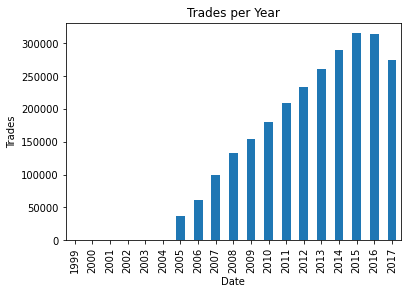

In [5]:
plt.title("Trades per Year")
plt.ylabel("Trades")
df["Ticker"].groupby(df["Date"].dt.year).count().plot(kind="bar")

In [6]:
df.sort_values(by=["Date"])

,Date,Open,High,Low,Close,Volume,Ticker
222837,1999-03-10,45.722,45.7500,44.967,45.665,11700414,qqq
222838,1999-03-11,45.994,46.2600,44.988,45.880,21670048,qqq
222839,1999-03-12,45.721,45.7490,44.406,44.770,19553768,qqq
222840,1999-03-15,45.101,46.1030,44.625,46.052,14245348,qqq
222841,1999-03-16,46.253,46.6430,45.749,46.447,10971066,qqq
...,...,...,...,...,...,...,...
491587,2017-11-10,35.620,35.6300,35.500,35.625,15985,ipkw
1376758,2017-11-10,37.590,37.7200,37.585,37.700,10324,ftls
2514505,2017-11-10,127.450,127.8200,127.295,127.450,256090,vbr
1373352,2017-11-10,36.320,36.4900,36.320,36.420,6207,cnxt


In [9]:
# declaring the time range of the data
begin=2005
end=2017
start=df[["Ticker","Date"]].loc[df.Date.dt.year==begin]
finish=df[["Ticker","Date"]].loc[df.Date.dt.year==end]

In [18]:
# filtering down to tickers that existed before 'begin' and are still there when it is 'end'
ts,tf=start.Ticker.unique().tolist(),finish.Ticker.unique().tolist()
tickers=[i for i in ts if i in tf]

In [41]:
tlDate=df[["Ticker","Date"]].loc[(df.Date.dt.year>=begin) & (df.Date.dt.year<=end)]
tlDate

,Ticker,Date
0,bab,2009-11-17
1,bab,2009-11-18
2,bab,2009-11-19
3,bab,2009-11-20
4,bab,2009-11-23
...,...,...
2565573,vea,2017-11-06
2565574,vea,2017-11-07
2565575,vea,2017-11-08
2565576,vea,2017-11-09


In [48]:
dates=np.array(tlDate.Date.unique(),dtype="datetime64[D]")
dates=np.sort(dates,axis=0)
print(dates)

['2005-01-03' '2005-01-04' '2005-01-05' ... '2017-11-08' '2017-11-09'
 '2017-11-10']


In [51]:
ticUse=[]
error=0
for tic in tickers:
    ds=np.array(tlDate.Date.loc[tlDate.Ticker==tic],dtype="datetime64[D]")
    try:
        if ds==dates:
            ticUse.append(ds)
    except:
        error=ds
        break

/home/victor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


In [53]:
print(len(error))

3239


In [64]:
print(len(tlDate.Date.loc[tlDate.Ticker==tickers[1]]))
print(len(tlDate.Date.loc[tlDate.Ticker==tickers[2]]))
print(len(dates))

3186
3201
3239


In [66]:
dates==np.array(tlDate.Date.loc[tlDate.Ticker==tickers[1]])

/home/victor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [67]:
len(np.array(tlDate.Date.loc[tlDate.Ticker==tickers[1]]))

3186

In [68]:
print(ticUse)

[]
